In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import string

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Tweets.csv to Tweets.csv


In [3]:
import io
raw=pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))

In [4]:
raw.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
raw.drop(columns=['textID','selected_text'],inplace=True)

In [7]:
raw.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
encoder = LabelEncoder()

In [9]:
raw['sentiment'] = encoder.fit_transform(raw['sentiment'])

In [10]:
raw.head()

,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


In [11]:
raw.isnull().sum()

text         1
sentiment    0
dtype: int64

In [12]:
raw_data=raw.dropna(how='any')

In [13]:
raw_data.shape

(27480, 2)

In [14]:
# check for duplicated values
raw_data.duplicated().sum()

0

In [15]:
X=raw_data['text']
Y=raw_data['sentiment']

In [16]:
raw_data['sentiment'].value_counts()

1    11117
2     8582
0     7781
Name: sentiment, dtype: int64

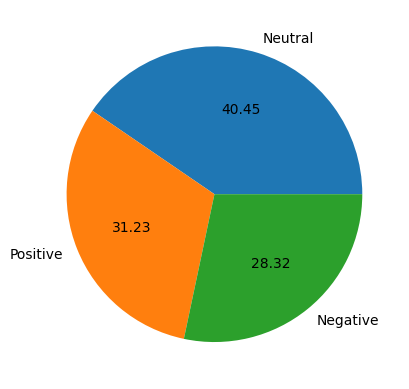

In [17]:
plt.pie(raw_data['sentiment'].value_counts(), labels=['Neutral', 'Positive', 'Negative'],autopct="%0.2f")
plt.show()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
raw_data['num_characters'] = raw_data['text'].apply(len)

<ipython-input-19-9fd41b4bd449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['num_characters'] = raw_data['text'].apply(len)


In [20]:
raw_data.head()

,text,sentiment,num_characters
0,"I`d have responded, if I were going",1,36
1,Sooo SAD I will miss you here in San Diego!!!,0,46
2,my boss is bullying me...,0,25
3,what interview! leave me alone,0,31
4,"Sons of ****, why couldn`t they put them on t...",0,75


In [21]:
raw_data['num_words'] = raw_data['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

<ipython-input-21-546bcbddfe91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['num_words'] = raw_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [22]:
raw_data.head()

,text,sentiment,num_characters,num_words
0,"I`d have responded, if I were going",1,36,10
1,Sooo SAD I will miss you here in San Diego!!!,0,46,13
2,my boss is bullying me...,0,25,6
3,what interview! leave me alone,0,31,6
4,"Sons of ****, why couldn`t they put them on t...",0,75,20


In [23]:
raw_data['num_sentences'] = raw_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-23-1b8ef2bc2a61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['num_sentences'] = raw_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
raw_data.head()

,text,sentiment,num_characters,num_words,num_sentences
0,"I`d have responded, if I were going",1,36,10,1
1,Sooo SAD I will miss you here in San Diego!!!,0,46,13,2
2,my boss is bullying me...,0,25,6,1
3,what interview! leave me alone,0,31,6,2
4,"Sons of ****, why couldn`t they put them on t...",0,75,20,1


In [25]:
raw_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,27480.000000,27480.000000,27480.000000
mean,68.330022,15.953748,1.713173
std,35.603870,8.558654,0.965417
min,3.000000,1.000000,1.000000
25%,39.000000,9.000000,1.000000
50%,64.000000,15.000000,1.000000
75%,97.000000,22.000000,2.000000
max,141.000000,106.000000,34.000000


In [26]:
raw_data[raw_data['sentiment']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7781.000000,7781.000000,7781.000000
mean,70.488112,16.756587,1.706593
std,35.155991,8.536245,0.914546
min,5.000000,1.000000,1.000000
25%,42.000000,10.000000,1.000000
50%,66.000000,16.000000,1.000000
75%,98.000000,23.000000,2.000000
max,141.000000,63.000000,10.000000


In [27]:
raw_data[raw_data['sentiment']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11117.00000,11117.000000,11117.000000
mean,65.20680,15.148062,1.623370
std,36.40755,8.702079,0.971622
min,3.00000,1.000000,1.000000
25%,35.00000,8.000000,1.000000
50%,59.00000,14.000000,1.000000
75%,94.00000,22.000000,2.000000
max,141.00000,106.000000,34.000000


In [28]:
raw_data[raw_data['sentiment']==2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8582.000000,8582.000000,8582.000000
mean,70.419133,16.269518,1.835470
std,34.647770,8.299568,0.988907
min,5.000000,1.000000,1.000000
25%,42.000000,9.000000,1.000000
50%,67.000000,15.000000,2.000000
75%,98.000000,23.000000,2.000000
max,138.000000,55.000000,19.000000


<Axes: xlabel='num_characters', ylabel='Count'>

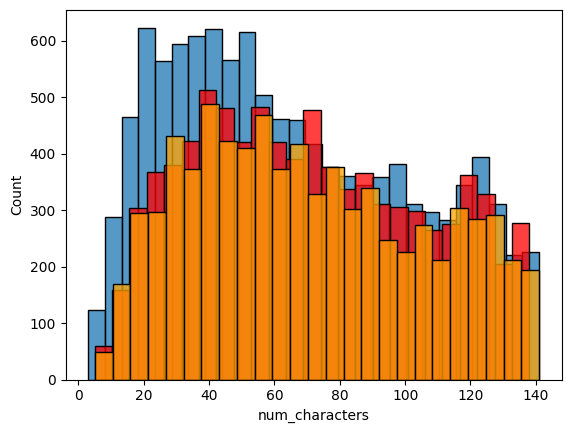

In [29]:
sns.histplot(raw_data[raw_data['sentiment']==1]['num_characters'],label='Negative')
sns.histplot(raw_data[raw_data['sentiment']==2]['num_characters'],label='Positive',color='red')
sns.histplot(raw_data[raw_data['sentiment']==0]['num_characters'],label='Neutral',color='orange')

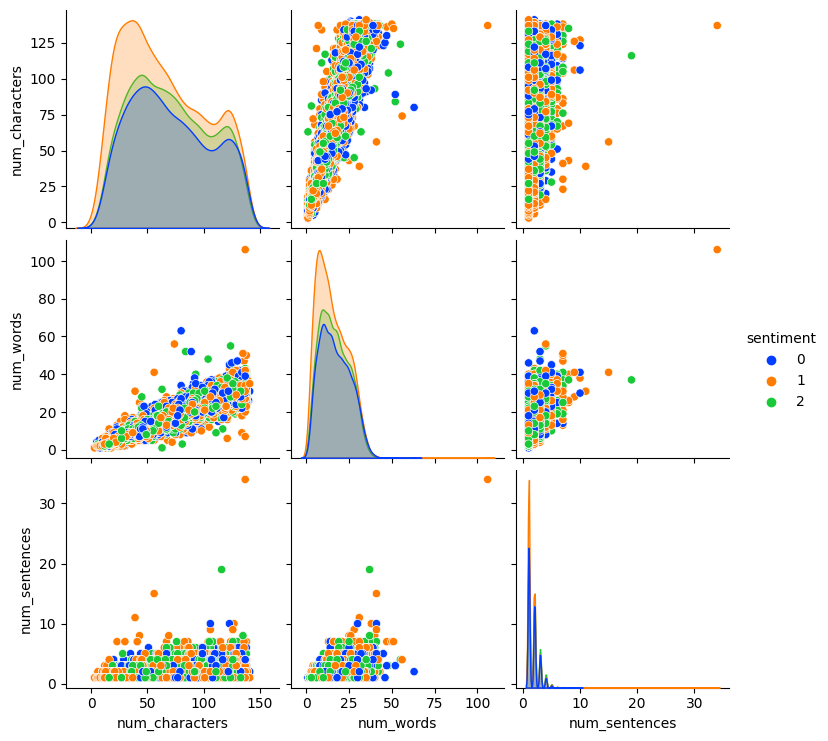

In [30]:
sns.pairplot(raw_data,hue='sentiment',palette='bright')

<ipython-input-31-fedcae8ce107>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), annot=True)


<Axes: >

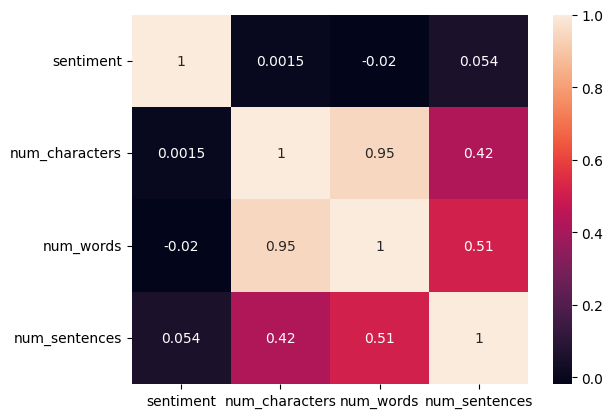

In [31]:
sns.heatmap(raw_data.corr(), annot=True)

3.Data preprocessing
>lower case
>tokenization
>Removing stop words and punctution
>Stemming

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  # cloning
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# import string 
# string.punctuation

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('dacing')


In [37]:
raw_data['transformed_text']=raw_data['text'].apply(transform_text)

<ipython-input-37-3302e0e081e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['transformed_text']=raw_data['text'].apply(transform_text)


In [38]:
raw_data.head()

,text,sentiment,num_characters,num_words,num_sentences,transformed_text
0,"I`d have responded, if I were going",1,36,10,1,respond go
1,Sooo SAD I will miss you here in San Diego!!!,0,46,13,2,sooo sad miss san diego
2,my boss is bullying me...,0,25,6,1,boss bulli
3,what interview! leave me alone,0,31,6,2,interview leav alon
4,"Sons of ****, why couldn`t they put them on t...",0,75,20,1,son put releas alreadi bought


In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
negative_wc=wc.generate(raw_data[raw_data['sentiment']==0]['transformed_text'].str.cat(sep=" "))

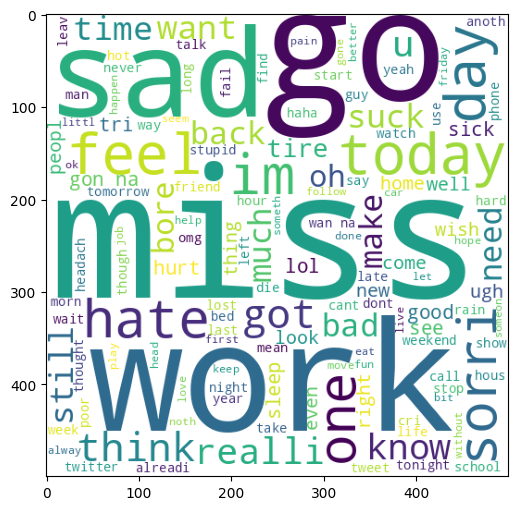

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [42]:
neutral_wc=wc.generate(raw_data[raw_data['sentiment']==1]['transformed_text'].str.cat(sep=" "))

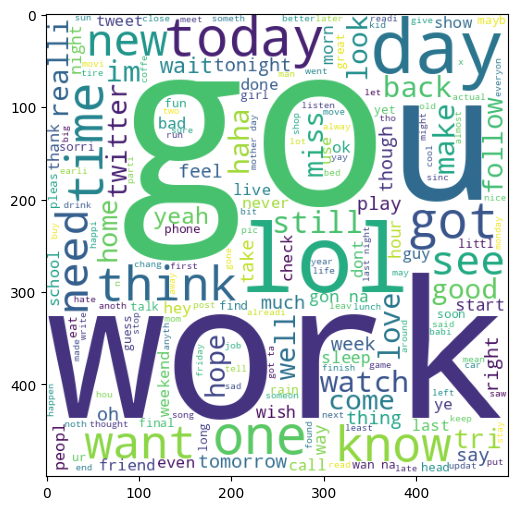

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(neutral_wc)

In [44]:
positive_wc=wc.generate(raw_data[raw_data['sentiment']==2]['transformed_text'].str.cat(sep=" "))

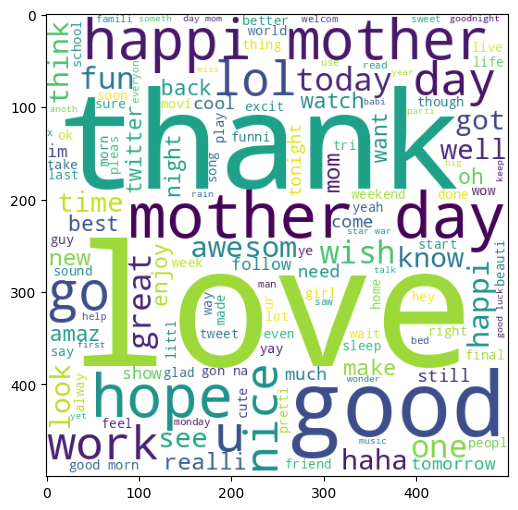

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [46]:
negative=[]
for msg in raw_data[raw_data['sentiment']==0]['transformed_text'].tolist():
  for word in msg.split():
    negative.append(word)

In [47]:
len(negative)

55666

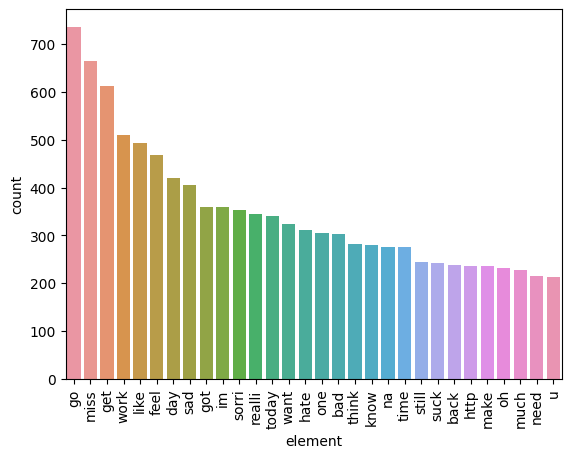

In [48]:
from collections import Counter
common_elements = Counter(negative).most_common(30)
df_common_elements = pd.DataFrame(common_elements, columns=['element', 'count'])
s1=sns.barplot(x='element', y='count', data=df_common_elements)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
neutral=[]
for msg in raw_data[raw_data['sentiment']==1]['transformed_text'].tolist():
  for word in msg.split():
    neutral.append(word)

In [50]:
len(neutral)

73270

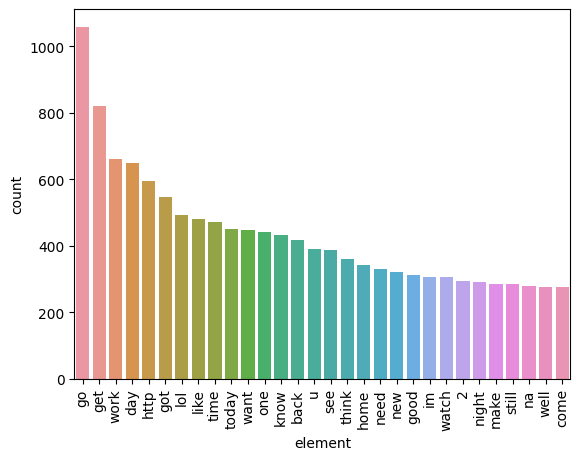

In [51]:
from collections import Counter
common_elements = Counter(neutral).most_common(30)
df_common_elements = pd.DataFrame(common_elements, columns=['element', 'count'])
s2=sns.barplot(x='element', y='count', data=df_common_elements)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
positive=[]
for msg in raw_data[raw_data['sentiment']==2]['transformed_text'].tolist():
  for word in msg.split():
    positive.append(word)

In [53]:
len(neutral)

73270

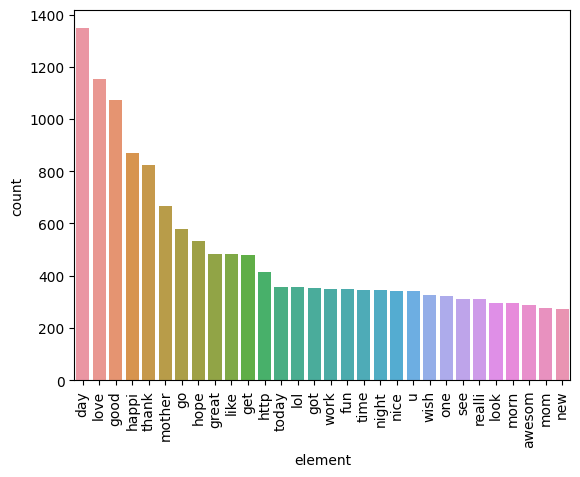

In [54]:
from collections import Counter
common_elements = Counter(positive).most_common(30)
df_common_elements = pd.DataFrame(common_elements, columns=['element', 'count'])
s2=sns.barplot(x='element', y='count', data=df_common_elements)
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [55]:
X=raw_data['transformed_text']
Y=raw_data['sentiment']

In [56]:
raw_data.head()

,text,sentiment,num_characters,num_words,num_sentences,transformed_text
0,"I`d have responded, if I were going",1,36,10,1,respond go
1,Sooo SAD I will miss you here in San Diego!!!,0,46,13,2,sooo sad miss san diego
2,my boss is bullying me...,0,25,6,1,boss bulli
3,what interview! leave me alone,0,31,6,2,interview leav alon
4,"Sons of ****, why couldn`t they put them on t...",0,75,20,1,son put releas alreadi bought


In [57]:
X.shape
# text, word

(27480,)

In [58]:
y=raw_data['sentiment'].values

In [59]:
y

array([1, 0, 0, ..., 2, 2, 1])

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

accuracy_scores1 = []
accuracy_scores2 = []


# define a pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=4000)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=2))
])

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# fit and train the model
pipeline.fit(X_train, y_train)

# evaluate on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score (test):", accuracy)

# evaluate on the train set
y_pred = pipeline.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy score (train):", accuracy)

# try other classifiers
clfs = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'Random Forest Classifier' : RandomForestClassifier(n_estimators=50, random_state=2),
    'Bagging Classifier'  : BaggingClassifier(n_estimators=50, random_state=2)

    # You can try this as well
    # 'Multinomial Naive Bayes': MultinomialNB(),rest
    # 'XGB Classifier': XGBClassifier(n_estimators=50, random_state=2),reat
    # 'AdaBoost Classifier': AdaBoostClassifier(n_estimators=50, random_state=2), 
    # 'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=50, random_state=2),
    # 'gnb' : GaussianNB(),
    # mnb = MultinomialNB()
    # 'bnb' : BernoulliNB()
    # 'svc' : SVC(kernel='sigmoid', gamma=1.0),
    # 'knc' : KNeighborsClassifier(),
    # 'dtc' : DecisionTreeClassifier(max_depth=5),

}

for name, clf in clfs.items():
    pipeline.set_params(classifier=clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"Accuracy score for {name} (test): {accuracy_test}")

    y_pred = pipeline.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred)
    print(f"Accuracy score for {name} (train): {accuracy_train}")
    accuracy_scores1.append(accuracy_test)
    accuracy_scores2.append(accuracy_train)



Accuracy score (test): 0.700509461426492
Accuracy score (train): 0.9909024745269287
Accuracy score for Logistic Regression (test): 0.7119723435225619
Accuracy score for Logistic Regression (train): 0.738901018922853
Accuracy score for Extra Trees Classifier (test): 0.7006914119359534
Accuracy score for Extra Trees Classifier (train): 0.9913573508005823
Accuracy score for Random Forest Classifier (test): 0.700509461426492
Accuracy score for Random Forest Classifier (train): 0.9909024745269287
Accuracy score for Bagging Classifier (test): 0.7043304221251819
Accuracy score for Bagging Classifier (train): 0.9899472343522562


In [61]:
performance_raw_data=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy training':accuracy_scores2,'Accuracy Test':accuracy_scores1}).sort_values('Accuracy Test',ascending=False)

In [62]:
performance_raw_data

,Algorithm,Accuracy training,Accuracy Test
0,Logistic Regression,0.738901,0.711972
3,Bagging Classifier,0.989947,0.704330
1,Extra Trees Classifier,0.991357,0.700691
2,Random Forest Classifier,0.990902,0.700509


In [63]:
performance_raw_data1 = pd.melt(performance_raw_data, id_vars = "Algorithm")

In [64]:
performance_raw_data1

,Algorithm,variable,value
0,Logistic Regression,Accuracy training,0.738901
1,Bagging Classifier,Accuracy training,0.989947
2,Extra Trees Classifier,Accuracy training,0.991357
3,Random Forest Classifier,Accuracy training,0.990902
4,Logistic Regression,Accuracy Test,0.711972
5,Bagging Classifier,Accuracy Test,0.704330
6,Extra Trees Classifier,Accuracy Test,0.700691
7,Random Forest Classifier,Accuracy Test,0.700509


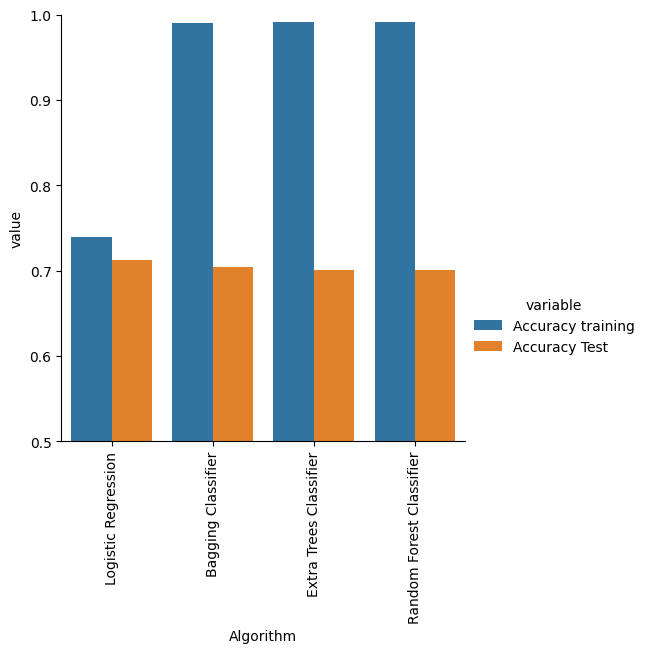

In [65]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_raw_data1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# xgb train it is running
# xgb.fit(X_train_features,y_train)
# y_pred1=gnb.predict(X_train_features)
# print(accuracy_score(y_train,y_pred1))
# print(confusion_matrix(y_train,y_pred1))
# print(precision_score(y_train,y_pred1, average='micro'))

In [67]:
# import pickle
# pickle.dump(feature_extraction,open('vectorizer2.pkl','wb'))
# pickle.dump(etc,open('model2.pkl','wb'))
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

# define a pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3500)),
    ('classifier', ExtraTreesClassifier(n_estimators=50, random_state=2))
])

# fit the pipeline on the data
pipeline.fit(X, y)

# save the pipeline and its components as pickled objects
pickle.dump(pipeline.named_steps['vectorizer'], open('vectorizer3.pkl', 'wb'))
pickle.dump(pipeline.named_steps['classifier'], open('model3.pkl', 'wb'))
